In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
files = [
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_confirmed.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_confirmed_US.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_deaths.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_deaths_US.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_recovered.csv'
]

In [3]:
df = pd.read_csv(files[0])
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [4]:
countryContinent = pd.read_csv('countryContinent.csv', encoding="cp855", usecols=['country', 'continent'])
countryContinent.head()

,country,continent
0,Afghanistan,Asia
1,┼land Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [5]:
confirmed = df.melt(['Country/Region'], df.columns[4:], var_name='Dates', value_name='Count')
confirmed.rename(columns={"Province/State": "province", "Country/Region": "country"}, inplace=True)
confirmed.Dates = pd.to_datetime(confirmed.Dates)

confirmed = pd.merge(confirmed,countryContinent, on='country')
confirmed.set_index('Dates', inplace=True)

confirmed.head()

,country,Count,continent
Dates,,,
2020-01-22,Afghanistan,0,Asia
2020-01-23,Afghanistan,0,Asia
2020-01-24,Afghanistan,0,Asia
2020-01-25,Afghanistan,0,Asia
2020-01-26,Afghanistan,0,Asia


In [6]:
days = pd.DataFrame(confirmed.Count.resample('d').mean())
weeks = pd.DataFrame(confirmed.Count.resample('w').mean())
months = pd.DataFrame(confirmed.Count.resample('M').mean())

days.Count = days.Count.astype(int)
weeks.Count = weeks.Count.astype(int)
months.Count = months.Count.astype(int)

In [7]:
days.head()

,Count
Dates,
2020-01-22,2
2020-01-23,2
2020-01-24,4
2020-01-25,6
2020-01-26,9


In [8]:
weeks.head()

,Count
Dates,
2020-01-26,4
2020-02-02,38
2020-02-09,131
2020-02-16,246
2020-02-23,326


In [9]:
months.head()

,Count
Dates,
2020-01-31,16
2020-02-29,245
2020-03-31,950
2020-04-30,5258
2020-05-31,11085


We'll train our model on days

In [10]:
days

,Count
Dates,
2020-01-22,2
2020-01-23,2
2020-01-24,4
2020-01-25,6
2020-01-26,9
...,...
2020-09-09,83708
2020-09-10,84779
2020-09-11,85887


In [11]:
test_size = 18
test_ind = len(days) - test_size

In [12]:
train = days.iloc[:test_ind,:]
test = days.iloc[test_ind:,:]

In [13]:
train

,Count
Dates,
2020-01-22,2
2020-01-23,2
2020-01-24,4
2020-01-25,6
2020-01-26,9
...,...
2020-08-22,67563
2020-08-23,68257
2020-08-24,69023


In [14]:
test.head()

,Count
Dates,
2020-08-27,71812
2020-08-28,72775
2020-08-29,73654
2020-08-30,74431
2020-08-31,75369


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

batch size should be less than len(test)

In [18]:
BL = 12

generator = TimeseriesGenerator(scaled_train, scaled_train, length=BL, batch_size=1)

In [19]:
x1, y1 = generator[0]
x2, y2 = generator[1]

In [20]:
print(f'{x1}\n{y1}')

[[[0.00000000e+00]
  [0.00000000e+00]
  [2.82270585e-05]
  [5.64541169e-05]
  [9.87947046e-05]
  [1.41135292e-04]
  [3.10497643e-04]
  [3.38724701e-04]
  [4.65746465e-04]
  [5.64541169e-04]
  [6.91562932e-04]
  [9.87947046e-04]]]
[[0.00117142]]


In [21]:
print(f'{x2}\n{y2}')

[[[0.00000000e+00]
  [2.82270585e-05]
  [5.64541169e-05]
  [9.87947046e-05]
  [1.41135292e-04]
  [3.10497643e-04]
  [3.38724701e-04]
  [4.65746465e-04]
  [5.64541169e-04]
  [6.91562932e-04]
  [9.87947046e-04]
  [1.17142293e-03]]]
[[0.00142547]]


we can see the length of the  batch is 9 (ie 18//2)

also we can see that y1 is the same value as x2[-1]

we'll also create the val generator

In [22]:
valGenerator = TimeseriesGenerator(scaled_test, scaled_test, length=BL, batch_size=1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.regularizers import l2

In [24]:
model = Sequential()

In [25]:
n_features = 1

model.add(LSTM(100,input_shape=(BL, n_features)))

# model.add(Dense(54,activation='relu',kernel_regularizer=l2(0.0001)))

# final layer
model.add(Dense(1))

In [26]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStop = EarlyStopping(monitor='val_loss', patience=6)

In [29]:
EPOCHS = 50

H = model.fit_generator(generator, epochs=EPOCHS, validation_data=valGenerator, callbacks=[earlyStop])

Epoch 1/50
206/206 [==============================] - 6s 29ms/step - loss: 0.0388 - val_loss: 0.0017
Epoch 2/50
206/206 [==============================] - 6s 29ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 3/50
206/206 [==============================] - 6s 30ms/step - loss: 2.8006e-04 - val_loss: 0.0057
Epoch 4/50
206/206 [==============================] - 6s 30ms/step - loss: 2.0672e-04 - val_loss: 0.0028
Epoch 5/50
206/206 [==============================] - 6s 31ms/step - loss: 1.5899e-04 - val_loss: 7.2630e-04
Epoch 6/50
206/206 [==============================] - 6s 30ms/step - loss: 1.1392e-04 - val_loss: 0.0014
Epoch 7/50
206/206 [==============================] - 6s 29ms/step - loss: 8.5382e-05 - val_loss: 0.0012
Epoch 8/50
206/206 [==============================] - 6s 29ms/step - loss: 5.0593e-05 - val_loss: 1.0161e-05
Epoch 9/50
206/206 [==============================] - 6s 28ms/step - loss: 3.6116e-05 - val_loss: 1.1472e-04
Epoch 10/50
206/206 [==============================

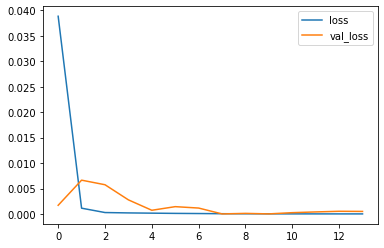

In [30]:
losses = pd.DataFrame(H.history)

losses.plot();

In [31]:
# last 12 rows from scaled_train
first_eval_batch = scaled_train[-BL:]
first_eval_batch

array([[0.87021199],
       [0.87990798],
       [0.88985802],
       [0.90196743],
       [0.91503655],
       [0.92795043],
       [0.94073729],
       [0.95352415],
       [0.96331894],
       [0.9741299 ],
       [0.98585824],
       [1.        ]])

In [32]:
test_predictions = []

current_batch = first_eval_batch.reshape((1, BL, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [33]:
# scaled output for next 18 days
test_predictions

[array([1.0094131], dtype=float32),
 array([1.0206913], dtype=float32),
 array([1.0319966], dtype=float32),
 array([1.0432981], dtype=float32),
 array([1.0544616], dtype=float32),
 array([1.0654306], dtype=float32),
 array([1.0762153], dtype=float32),
 array([1.0868204], dtype=float32),
 array([1.0972396], dtype=float32),
 array([1.1076372], dtype=float32),
 array([1.1179357], dtype=float32),
 array([1.1280731], dtype=float32),
 array([1.137906], dtype=float32),
 array([1.147704], dtype=float32),
 array([1.1573418], dtype=float32),
 array([1.1668103], dtype=float32),
 array([1.1761017], dtype=float32),
 array([1.1852163], dtype=float32)]

In [34]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions # inverse

array([[71522.95742631],
       [72322.05964112],
       [73123.08764768],
       [73923.84536767],
       [74714.82209277],
       [75492.02264977],
       [76256.15654087],
       [77007.57007074],
       [77745.81557727],
       [78482.52382898],
       [79212.21307659],
       [79930.49116349],
       [80627.18855786],
       [81321.41958737],
       [82004.29858136],
       [82675.17516279],
       [83333.50875854],
       [83979.31626153]])

In [35]:
test['Predictions'] = true_predictions.astype(int)
test

C:\Users\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Count,Predictions
Dates,,
2020-08-27,71812,71522
2020-08-28,72775,72322
2020-08-29,73654,73123
2020-08-30,74431,73923
2020-08-31,75369,74714
2020-09-01,76280,75492
2020-09-02,77271,76256
2020-09-03,78240,77007
2020-09-04,79318,77745


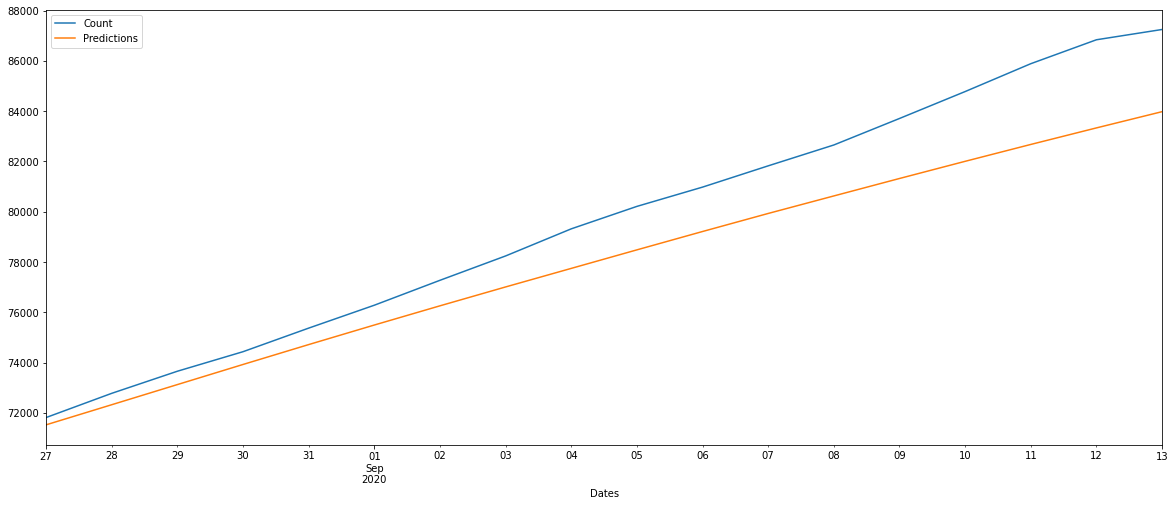

In [36]:
test.plot(figsize=(20,8));

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

(mean_squared_error(test.Count, test.Predictions))**0.5

1935.0860302437318

In [39]:
r2_score(test.Count, test.Predictions)

0.8380676747530174